In [ ]:
###   Importação de bibliotecas   ###

In [1]:
import supercon_dados as tsd
import supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [3]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [4]:
###   Treinamento do modelo com os melhores hiperparâmetros   ###

In [5]:
treino=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [6]:
###   Treino com todos os parâmetros   ###

treino.fit(X_treino,Y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [7]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino.predict(X_treino),Y_treino)))


 R^2: 
 0.9738736982204191 
 RMSE : 
 5.529339862965766


In [8]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino.predict(X_teste),Y_teste)))


 R^2: 
 0.931244851767081 
 RMSE : 
 8.947093999696458


In [3]:
### Avaliando a média das medidas de desempenho com dados distribuídos de forma aleatória diferente ###

for c in [21,31,41,51,70]:
    
    ver_r2 = []
    ver_rmse = []
    
    
    X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem,random_state=c)
    
    treino=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
    
    treino.fit(X_treino,Y_treino)
    
    ver_r2.append(treino.score(X_teste,Y_teste))
    ver_rmse.append(np.sqrt(mean_squared_error(treino.predict(X_teste),Y_teste)))
    
    
ver_r2 = np.array(ver_r2)
ver_rmse = np.array(ver_rmse)

print(np.median(ver_r2),np.median(ver_rmse))

0.9319568589645332 8.965344385086556


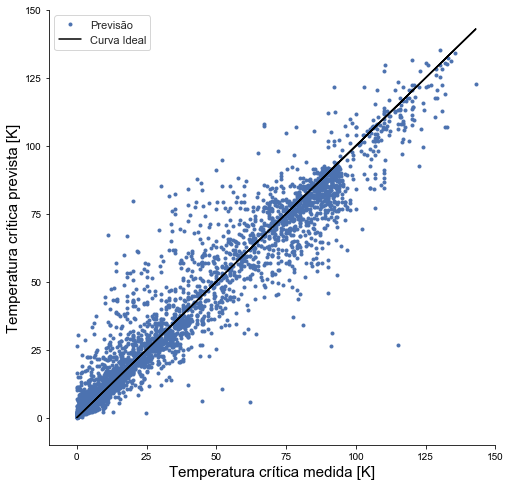

In [9]:
###   Gráfico que mostra sa previsões sobre o conjunto de teste   ###


print_x = Y_teste
print_y = treino.predict(X_teste)

f, ax = plt.subplots(figsize=(8, 8))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])

plt.savefig('floresta_aleatoria_Tp_Tc.png', format='png')
plt.show()


In [10]:
###  Visualização de Erros   ###

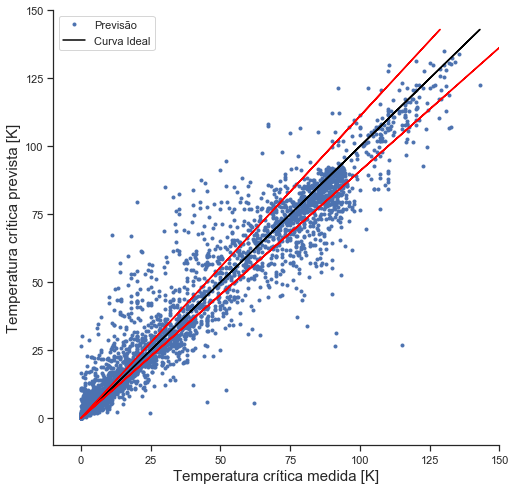

In [11]:
###   Gráfico que mostra sa previsões sobre o conjunto de teste   ###


print_x = Y_teste
print_y = treino.predict(X_teste)

fig, ax = plt.subplots(figsize=(8, 8))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')
plt.plot(print_x*0.9,print_x, '-', color = 'red')
plt.plot(print_x*1.1,print_x, '-', color = 'red')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])

plt.show()

In [12]:
###   Análise por faixa de temperatura   ###

In [18]:
#Dados das previsões e do banco de dados NIMS

dados_agrupamento=pd.DataFrame({'Y_teste':Y_teste ,'Y_previsto':treino.predict(X_teste)})

In [19]:
dados_agrupamento['Desvio'] = abs((dados_agrupamento['Y_previsto']-dados_agrupamento['Y_teste']))/dados_agrupamento['Y_teste']

In [20]:
# condições para avaliar as faixas de temperatura

def agrupar(x):
    
    lista = np.linspace(0, 150,16)
    
    for i in range(len(lista)):
        
        if x['Y_teste']<lista[i+1] and x['Y_teste']>=lista[i]:
            
            return i 
        
dados_agrupamento['grupo'] = dados_agrupamento.apply(agrupar, axis=1)

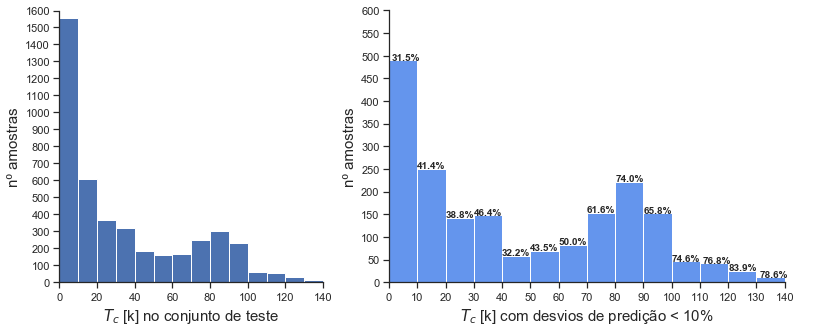

In [21]:
f, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 6]},figsize=(13, 5) )

sns.set(style="ticks")
sns.despine()

y = []

for c in range(max(dados_agrupamento['grupo'])+1):
    
    y.append(len(dados_agrupamento.loc[dados_agrupamento['grupo']==c]))

ax[0].bar(np.linspace(0, 140,15,endpoint=True)+5,np.array(y),width=10)


y2 = []

for c in range(max(dados_agrupamento['grupo'])+1):


    y2.append(len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)&(dados_agrupamento['Desvio']<=0.1)]))
    
ax[1].bar(np.linspace(0, 140,15,endpoint=True)+5,np.array(y2),color='cornflowerblue',width=10)   



for c in range(max(dados_agrupamento['grupo'])+1):
    
    if c==0 or c==11 or c==13 or c==14:
        
        a = len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)&(dados_agrupamento['Desvio']<=0.1)])
        b = len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)])
        p = round((a/b)*100, 1)

        cx = c*10

        ax[1].annotate(str(p)+'%', xy = (cx+1,a),fontsize = 10,fontweight='bold')
    
    else:
        
        a = len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)&(dados_agrupamento['Desvio']<=0.1)])
        b = len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)])
        p = round((a/b)*100, 1)

        cx = c*10

        ax[1].annotate(str(p)+'%', xy = (cx,a),fontsize = 10,fontweight='bold')


ax[0].set_ylabel('nº amostras',fontsize = 15)
ax[0].set_xlabel('$T_c$ [k] no conjunto de teste',fontsize = 15)
ax[1].set_ylabel('nº amostras',fontsize = 15)
ax[1].set_xlabel('$T_c$ [k] com desvios de predição < 10%',fontsize = 15)

ax[0].axis([0,140,0,1600])
ax[1].axis([0,140,0,600])

ax[0].set_yticks(np.linspace(0, 1600, 17, endpoint=True))
ax[0].set_xticks(np.linspace(0, 140, 8, endpoint=True))

ax[1].set_yticks(np.linspace(0, 600, 13, endpoint=True))
ax[1].set_xticks(np.linspace(0, 140, 15, endpoint=True))

plt.savefig('floresta_aleatoria_erros.png', format='png')

In [22]:
###   Avaliando as principais características do modelo   ###

In [23]:
#Conjunto de dados usados para avaliar os melhores parâmetros

importancia = pd.DataFrame(np.transpose(treino.feature_importances_),index=X_treino.columns)
importancia_ordenada=importancia.sort_values(ascending=False,by=[0])
importancia_ordenada_top_15=np.transpose(importancia_ordenada.iloc[0:15,:])
importancia_ordenada_top_5=np.transpose(importancia_ordenada.iloc[0:5,:])

In [24]:
r_quadrado = []
erro_rmse = []

treino_n_parametros=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

for n_parametros in range(len(X_treino.columns)):
    
    treino_n_parametros.fit(X_treino.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]],Y_treino)
    
    r_quadrado.append(treino_n_parametros.score(X_teste.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]],Y_teste))
    erro_rmse.append(np.sqrt(mean_squared_error(treino_n_parametros.predict(X_teste.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]]),Y_teste)))

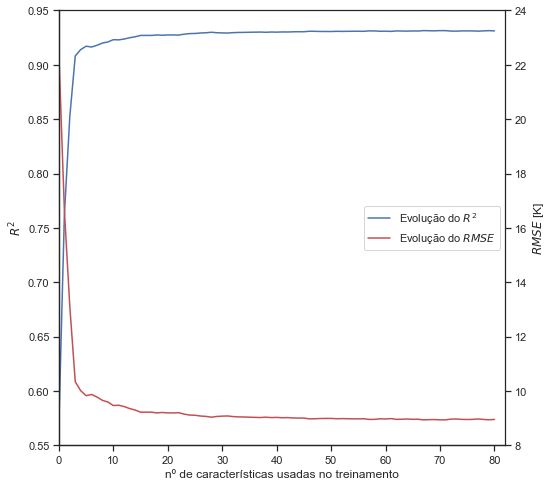

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.set(style="ticks")
sns.despine()

lns1 = ax.plot(r_quadrado, '-',color='b', label = 'Evolução do $R^2$')
ax.set_ylabel('$R^2$') 
ax.set_xlabel('nº de características usadas no treinamento')
# lns3 = ax.plot([81,81],[0,1], color = 'gray', label = 'nº parâmetros = 81')


ax2 = ax.twinx()
ax2.set_ylabel('$RMSE$ [K]') 
lns2 = ax2.plot(erro_rmse, '-', label = 'Evolução do $RMSE$',color='r')

ax.set_ylim(0.55, 0.95)
ax.set_xlim(0,82)
ax2.set_ylim(8,24)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)


plt.savefig('floresta_aleatoria_ganho_info.png', format='png')

In [26]:
###   As 15 características mais importantes do modelo   ###

([<matplotlib.axis.XTick at 0x17a9e9d3d48>,
 <a list of 6 Text xticklabel objects>)

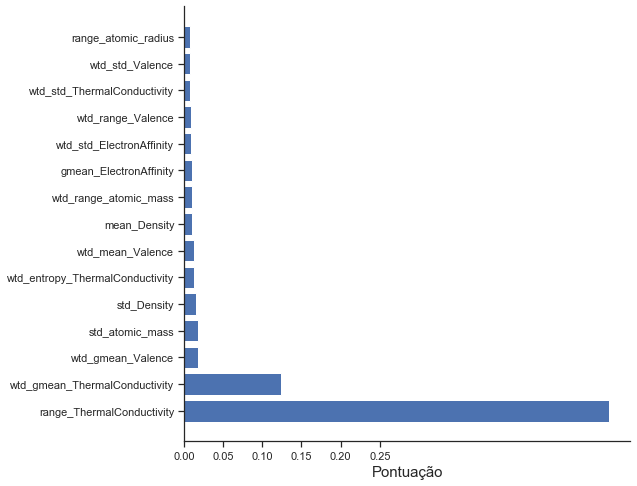

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.despine()
plt.barh(importancia_ordenada_top_15.columns, importancia_ordenada_top_15.values[0],color="b")
plt.xlabel('Pontuação',fontsize = 15)
plt.xticks(np.linspace(0, 0.25, 6, endpoint=True))

In [28]:
X_treino_importancia = X_treino.loc[:,importancia_ordenada_top_15.columns]
X_teste_importancia = X_teste.loc[:,importancia_ordenada_top_15.columns]

In [30]:
treino_importancia=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [31]:
treino_importancia.fit(X_treino_importancia,Y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia.score(X_treino_importancia,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia.predict(X_treino_importancia),Y_treino)))


 R^2: 
 0.9710122261766869 
 RMSE : 
 5.8242733218475875


In [33]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia.score(X_teste_importancia,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia.predict(X_teste_importancia),Y_teste)))


 R^2: 
 0.9257647204238465 
 RMSE : 
 9.296823008491382


In [34]:
###   As 5 principais características do modelo   ###

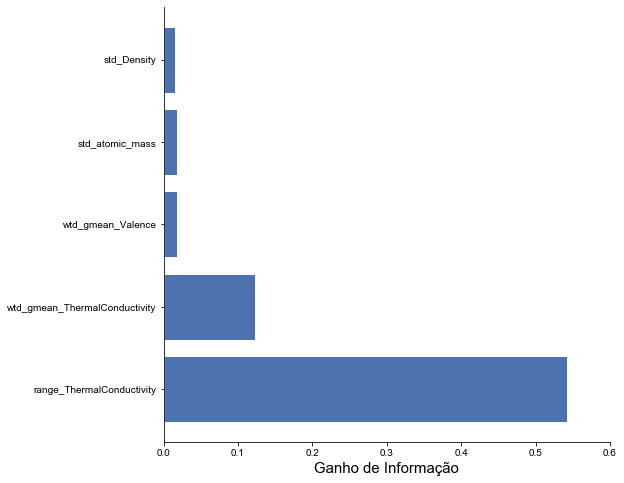

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.set(style="ticks")
sns.despine()
plt.barh(importancia_ordenada_top_5.columns, importancia_ordenada_top_5.values[0],color="b")
plt.xlabel('Ganho de Informação',fontsize = 15)
plt.xticks(np.linspace(0, .6, 7, endpoint=True))

plt.savefig('floresta_aleatoria_principais5.png', format='png')

In [36]:
X_treino_importancia_5 = X_treino.loc[:,importancia_ordenada_top_5.columns]
X_teste_importancia_5 = X_teste.loc[:,importancia_ordenada_top_5.columns]

In [37]:
treino_importancia_5=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
treino_importancia_5.fit(X_treino_importancia_5,Y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia_5.score(X_treino_importancia_5,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia_5.predict(X_treino_importancia_5),Y_treino)))


 R^2: 
 0.9632663071719118 
 RMSE : 
 6.556417644162612


In [40]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia_5.score(X_teste_importancia_5,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia_5.predict(X_teste_importancia_5),Y_teste)))


 R^2: 
 0.913677654381366 
 RMSE : 
 10.025152903325944


In [41]:
### Testes com supercondutores do DEMAR EEL USP ###

In [42]:
# 9.5 K no Ti2GeC
# 4.1 K no HfV2Ga4
# 4.0 K no NiTe2
# 3.1 K no Ti2InC
# 7.8 K no Nb2SnC
# 8.7 K no Zr0.96V0.04B2
# 15.3 K no Nb5Ge3
# 7 K no Zr5Pt3C0.3

In [43]:
# 9.5 K no Ti2GeC

treino.predict(tsd.analisar('Ti2GeC'))

Material:  Ti2Ge1C1


array([9.36772386])

In [44]:
# 4.1 K no HfV2Ga4

treino.predict(tsd.analisar('HfV2Ga4'))

Material:  Hf1V2Ga4


array([7.34693501])

In [45]:
# 4.0 K no NiTe2

treino.predict(tsd.analisar('NiTe2'))

Material:  Ni1Te2


array([2.201839])

In [46]:
# 3.1 K no Ti2InC

treino.predict(tsd.analisar('Ti2InC'))

Material:  Ti2In1C1


array([4.78332572])

In [47]:
# 7.8 K no Nb2SnC

treino.predict(tsd.analisar('Nb2SnC'))

Material:  Nb2Sn1C1


array([6.44880608])

In [48]:
# 8.7 K no Zr0.96V0.04B2

treino.predict(tsd.analisar('Zr0.96V0.04B2'))

Material:  Zr0.96V0.04B2


array([7.83770294])

In [49]:
# 15.3 K no Nb5Ge3

treino.predict(tsd.analisar('Nb5Ge3'))

Material:  Nb5Ge3


array([2.03802885])

In [50]:
# 7 K no Zr5Pt3C0.3

treino.predict(tsd.analisar('Zr5Pt3C0.3'))

Material:  Zr5Pt3C0.3


array([6.391486])